In [5]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [6]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

#연도별 사고비율 중 제일 큰 연도에 대한 월별,일별,시간별 사고건수

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./도로교통공단_월별 요일별 교통사고(2019).csv',encoding='EUC-KR' )
df2 = pd.read_csv('./도로교통공단_요일별 시간대별 교통사고(2019).csv', encoding='EUC-KR')

# 2019년 월별 사고건수
monthly_accidents = df.groupby('월')['사고건수'].sum()

# 사고건수가 가장 많은 2019년 요일 찾기
max_accidents_day = df2.groupby('요일')['사고건수'].sum().idxmax()

# 해당 요일의 데이터 선택
selected_day_data = df2[df2['요일'] == max_accidents_day]

# 그래프: 연도별 비율 파이 차트, 월별 사고건수 막대 그래프, 시간대별 사고건수 막대 그래프, 요일별 사고건수 막대 그래프
plt.figure(figsize=(18, 8))

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

# subplot 1: 연도별 비율 파이 차트

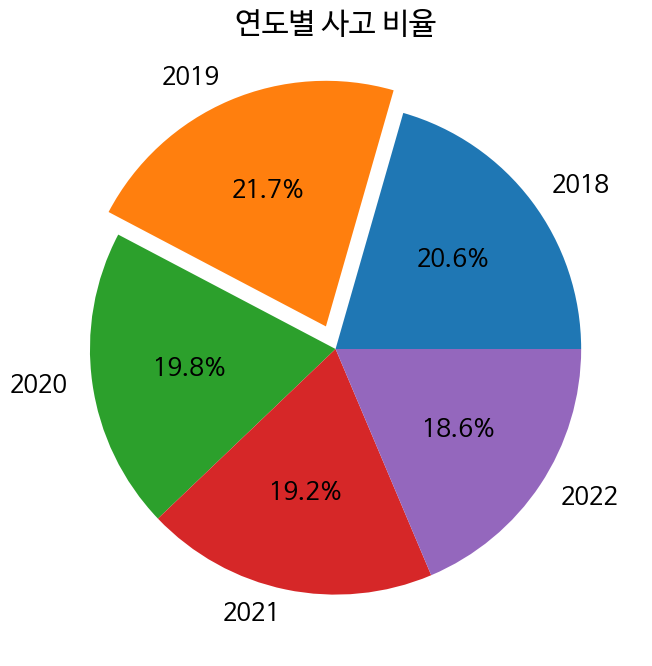

In [39]:
ratio = [20.55, 21.73, 19.84, 19.23, 18.63]
labels = ['2018', '2019', '2020', '2021', '2022']
explode = [0, 0.1, 0, 0.0, 0.0]
plt.pie(ratio, labels=labels, explode=explode, autopct='%.1f%%')
plt.title('연도별 사고 비율')

# 크기 조절
plt.gcf().set_size_inches(12, 7)

plt.tight_layout()  # subplot 간 간격 조절
plt.show()

# subplot 2: 월별 사고건수 막대 그래프

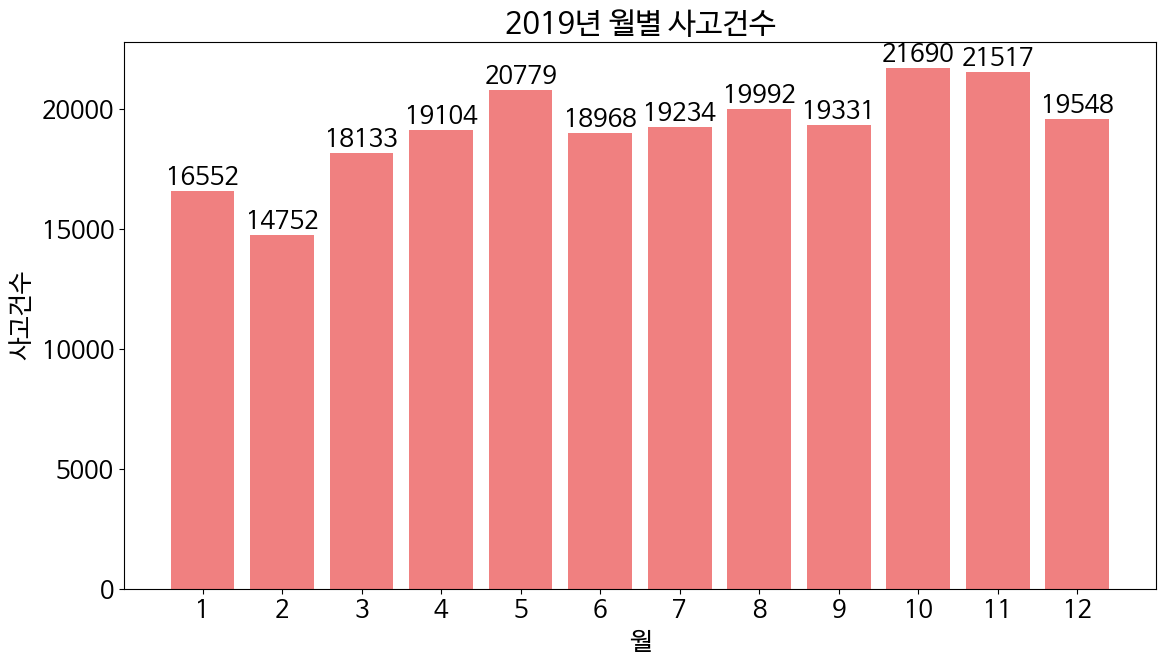

In [35]:
bars_monthly = plt.bar(monthly_accidents.index.astype(str), monthly_accidents.values, color='lightcoral')
plt.title('2019년 월별 사고건수')
plt.xlabel('월')
plt.ylabel('사고건수')
for bar, value in zip(bars_monthly, monthly_accidents.values):
    yval = value
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')
# 그래프 크기 조절
plt.gcf().set_size_inches(12, 7)

plt.tight_layout()  # subplot 간 간격 조절
plt.show()

# subplot 3: 시간대별 사고건수 막대 그래프

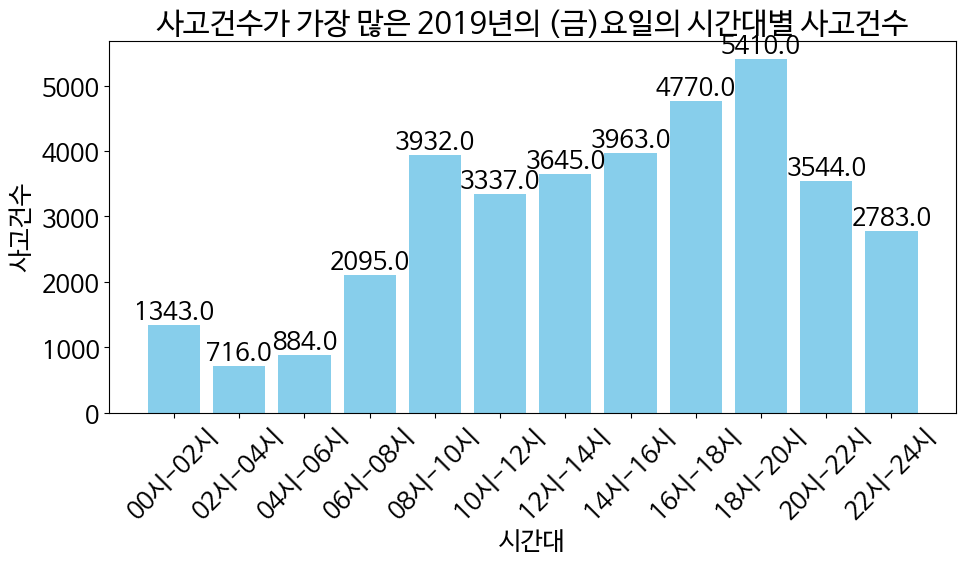

In [30]:
bars_time = plt.bar(selected_day_data['시간대'], selected_day_data['사고건수'], color='skyblue')
plt.title(f'사고건수가 가장 많은 2019년의 ({max_accidents_day})요일의 시간대별 사고건수')
plt.xlabel('시간대')
plt.ylabel('사고건수')
plt.xticks(rotation=45)
for bar, value in zip(bars_time, selected_day_data['사고건수']):
    yval = value
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')
# 그래프 크기 조절
plt.gcf().set_size_inches(10, 6)

plt.tight_layout()  # subplot 간 간격 조절
plt.show()

# subplot 4: 요일별 사고건수 막대 그래프

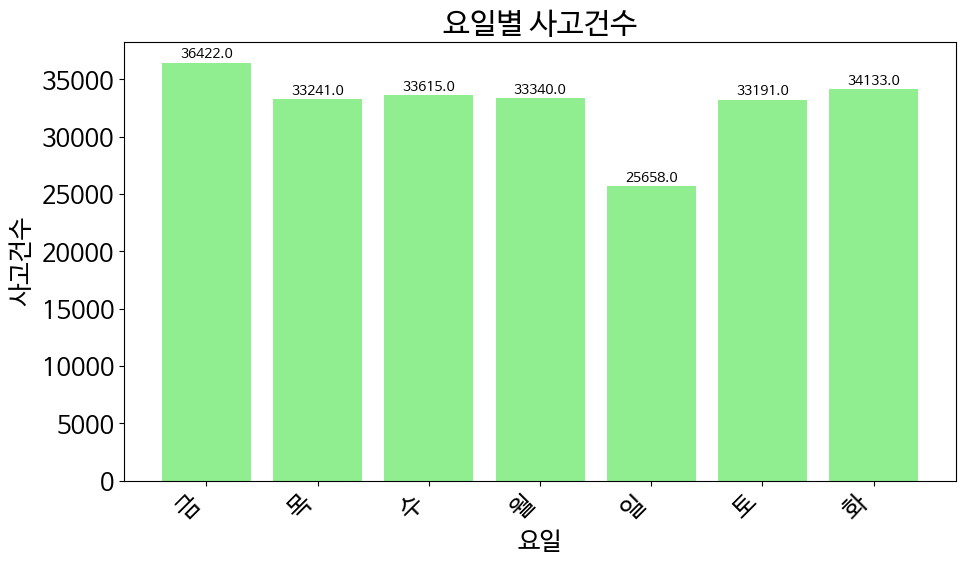

In [27]:
weekday_accidents = df2.groupby('요일')['사고건수'].sum()
weekday_bars = plt.bar(weekday_accidents.index, weekday_accidents.values, color='lightgreen')
plt.title('요일별 사고건수')
plt.xlabel('요일')
plt.ylabel('사고건수')

# x축 레이블 간격을 조절하여 겹치지 않도록 함
plt.xticks(rotation=45, ha='right')

for bar, value in zip(weekday_bars, weekday_accidents.values):
    yval = value
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 50, round(yval, 1), ha='center', va='bottom', fontsize=10)

# 그래프 크기 조절
plt.gcf().set_size_inches(10, 6)

plt.tight_layout()  # subplot 간 간격 조절
plt.show()


#시각화 한 눈에 보기

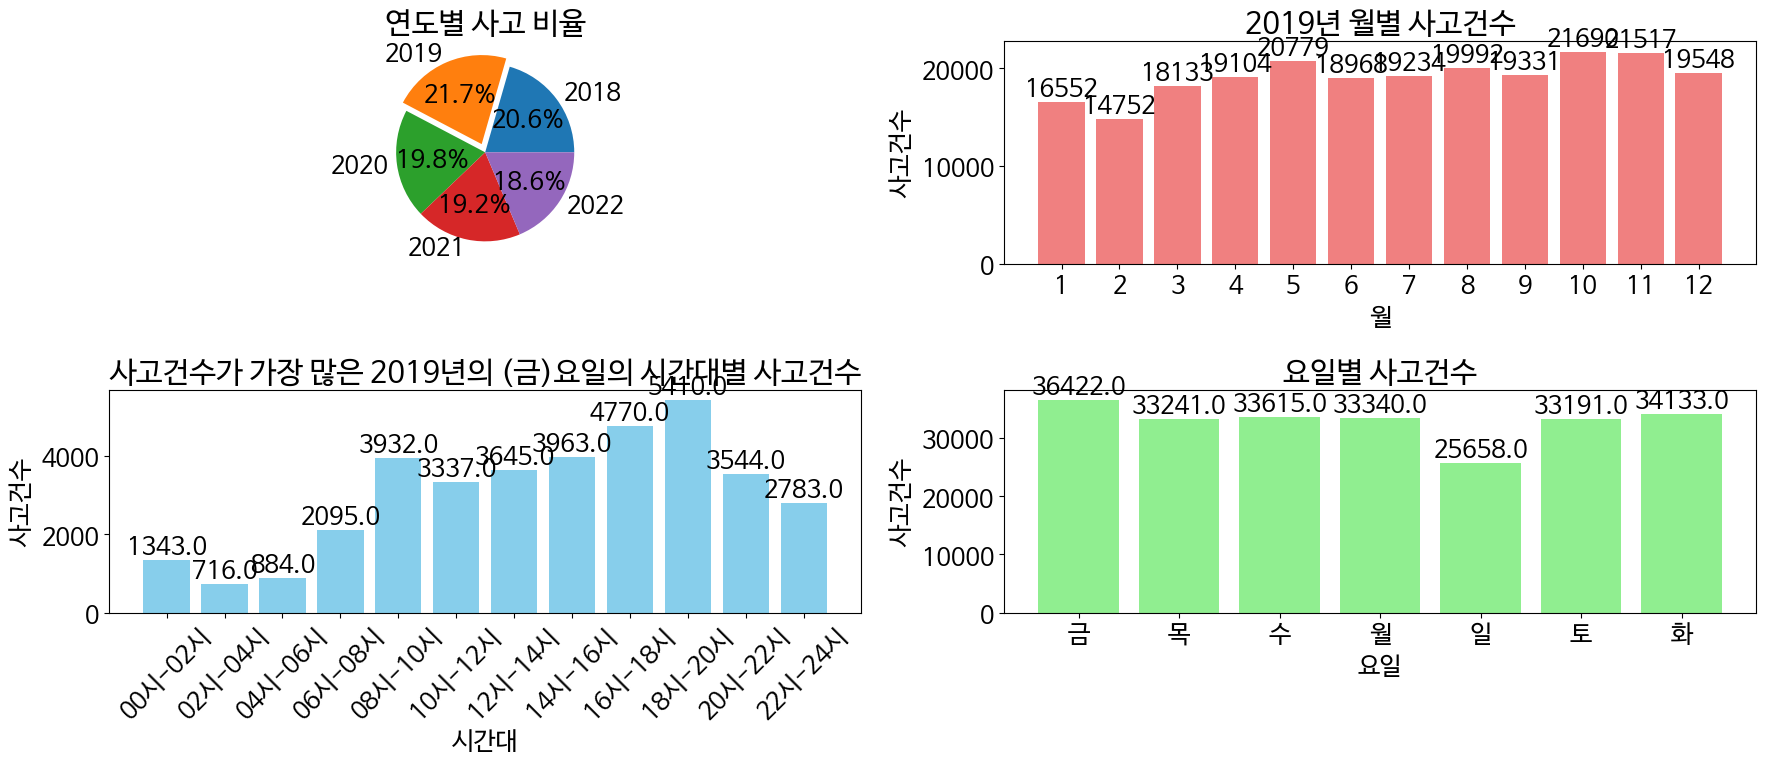

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./도로교통공단_월별 요일별 교통사고(2019).csv',encoding='EUC-KR' )
df2 = pd.read_csv('./도로교통공단_요일별 시간대별 교통사고(2019).csv', encoding='EUC-KR')


# 2019년 월별 사고건수
monthly_accidents = df.groupby('월')['사고건수'].sum()

# 사고건수가 가장 많은 2019년 요일 찾기
max_accidents_day = df2.groupby('요일')['사고건수'].sum().idxmax()

# 해당 요일의 데이터 선택
selected_day_data = df2[df2['요일'] == max_accidents_day]

# 그래프: 연도별 비율 파이 차트, 월별 사고건수 막대 그래프, 시간대별 사고건수 막대 그래프, 요일별 사고건수 막대 그래프
plt.figure(figsize=(18, 8))

# subplot 1: 연도별 비율 파이 차트
plt.subplot(2, 2, 1)
ratio = [20.55, 21.73, 19.84, 19.23, 18.63]
labels = ['2018', '2019', '2020', '2021', '2022']
explode = [0, 0.1, 0, 0.0, 0.0]
plt.pie(ratio, labels=labels, explode=explode, autopct='%.1f%%')
plt.title('연도별 사고 비율')

# subplot 2: 월별 사고건수 막대 그래프
plt.subplot(2, 2, 2)
bars_monthly = plt.bar(monthly_accidents.index.astype(str), monthly_accidents.values, color='lightcoral')
plt.title('2019년 월별 사고건수')
plt.xlabel('월')
plt.ylabel('사고건수')

for bar, value in zip(bars_monthly, monthly_accidents.values):
    yval = value
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

# subplot 3: 시간대별 사고건수 막대 그래프
plt.subplot(2, 2, 3)
bars_time = plt.bar(selected_day_data['시간대'], selected_day_data['사고건수'], color='skyblue')
plt.title(f'사고건수가 가장 많은 2019년의 ({max_accidents_day})요일의 시간대별 사고건수')
plt.xlabel('시간대')
plt.ylabel('사고건수')
plt.xticks(rotation=45)

for bar, value in zip(bars_time, selected_day_data['사고건수']):
    yval = value
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

# subplot 4: 요일별 사고건수 막대 그래프
plt.subplot(2, 2, 4)
weekday_accidents = df2.groupby('요일')['사고건수'].sum()
weekday_bars = plt.bar(weekday_accidents.index, weekday_accidents.values, color='lightgreen')
plt.title('요일별 사고건수')
plt.xlabel('요일')
plt.ylabel('사고건수')

for bar, value in zip(weekday_bars, weekday_accidents.values):
    yval = value
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

plt.tight_layout()  # subplot 간 간격 조절
plt.show()

#음주운전 재범율과 교통사고 비율의 상관관계

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# 첫 번째 데이터셋: 음주운전 재범율

In [45]:
data_repeated_offense = {
    '년도': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    '1회': [179086, 151488, 142803, 154992, 142258, 135096, 125736, 114585, 90168, 73572, 64229, 64300, 75245],
    '2회': [79314, 67195, 63990, 69863, 64813, 63018, 57666, 51130, 40648, 31487, 28347, 27355, 29676],
    '3회': [30103, 26172, 25607, 28862, 28183, 27552, 25856, 23396, 19025, 14693, 13836, 13278, 13830],
    '4회': [9705, 8925, 9094, 10391, 10534, 10810, 10494, 9364, 7884, 6416, 6273, 6150, 6473],
    '5회': [3118, 3017, 3179, 3718, 3775, 4171, 4131, 3896, 3189, 2696, 2735, 2636, 2838],
    '6회': [903, 929, 1085, 1285, 1396, 1556, 1599, 1527, 1280, 1102, 1228, 1186, 1238],
    '7회이상': [478, 487, 525, 725, 829, 897, 1117, 1289, 866, 806, 901, 977, 983]
}
df_repeated_offense = pd.DataFrame(data_repeated_offense)

# 두 번째 데이터셋: 연도별 교통사고 비율

In [46]:
data_accident_ratio = {
    '연도': ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
    '비율': [0, 0, 0, 0, 0, 0, 0, 0,20.55, 21.73, 19.84, 19.23, 18.63]  # 0으로 채워서 길이를 맞춤
}
df_accident_ratio = pd.DataFrame(data_accident_ratio)

# '연도' 열을 문자열로 변경

In [47]:
df_repeated_offense['년도'] = df_repeated_offense['년도'].astype(str)

# '연도' 열을 기준으로 merge

In [48]:
merged_df = pd.merge(df_repeated_offense, df_accident_ratio, left_on='년도', right_on='연도')

# 상관관계 계산

In [49]:
correlation = merged_df['1회'].corr(merged_df['비율'])

# 시각화

In [50]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

# 음주운전 재범율 시각화

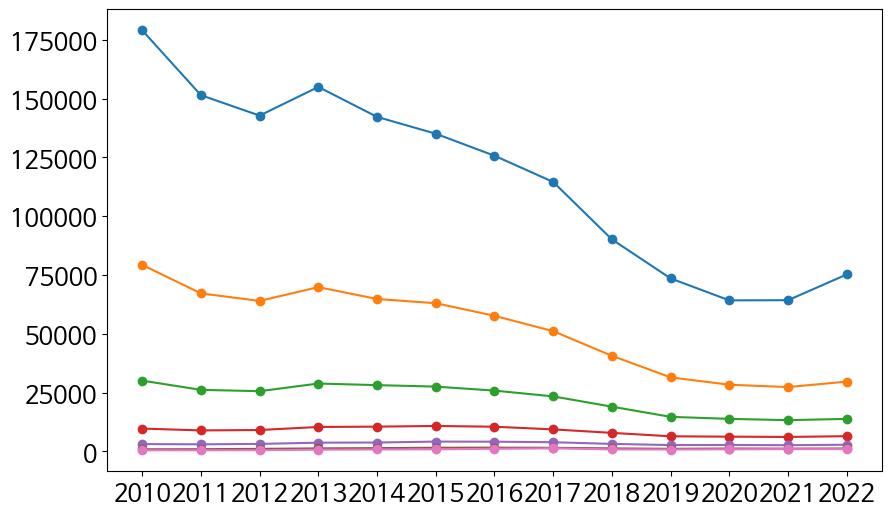

In [55]:
plt.plot(merged_df['년도'], merged_df['1회'], marker='o', label='음주운전 1회')
plt.plot(merged_df['년도'], merged_df['2회'], marker='o', label='음주운전 2회')
plt.plot(merged_df['년도'], merged_df['3회'], marker='o', label='음주운전 3회')
plt.plot(merged_df['년도'], merged_df['4회'], marker='o', label='음주운전 4회')
plt.plot(merged_df['년도'], merged_df['5회'], marker='o', label='음주운전 5회')
plt.plot(merged_df['년도'], merged_df['6회'], marker='o', label='음주운전 6회')
plt.plot(merged_df['년도'], merged_df['7회이상'], marker='o', label='음주운전 7회 이상')
# 그래프 크기 조절
plt.gcf().set_size_inches(10, 6)

# 교통사고 비율 시각화

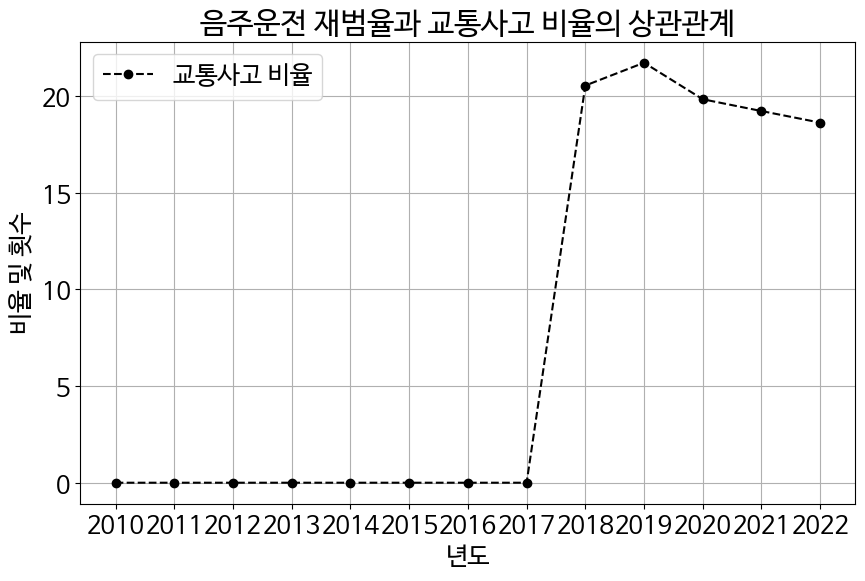

In [56]:
plt.plot(merged_df['년도'], merged_df['비율'], marker='o', linestyle='--', color='black', label='교통사고 비율')

plt.title('음주운전 재범율과 교통사고 비율의 상관관계')
plt.xlabel('년도')
plt.ylabel('비율 및 횟수')
# 그래프 크기 조절
plt.gcf().set_size_inches(10, 6)
plt.legend()
plt.grid(True)
plt.show()


# 상관관계 출력

In [53]:
print(f"상관관계: {correlation}")

상관관계: -0.9038472602302867


#연령대별 교통사고 추이

# 주어진 데이터를 데이터프레임으로 생성

In [ ]:
data = {
    '구분': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    '10대': [1910, 1693, 1731, 1688, 1773, 1933, 1761, 1614, 1304, 1278, 1246],
    '20대': [59445, 48217, 44968, 46242, 41857, 40497, 39627, 38251, 30372, 25969, 22090],
    '30대': [93114, 79594, 75883, 83313, 75954, 71102, 66090, 58244, 45015, 35097, 28429],
    '40대': [94149, 79279, 75286, 81250, 75451, 71266, 64556, 55877, 43097, 32678, 29153],
    '50대이상': [53929, 49394, 50062, 57230, 56640, 58235, 54448, 51134, 43239, 35720, 36610]
}

df = pd.DataFrame(data)

# 시각화

In [ ]:
plt.figure(figsize=(10, 6))

# 각 연령대에 대한 막대 그래프

In [ ]:
for age_group in ['10대', '20대', '30대', '40대', '50대이상']:
    plt.plot(df['구분'], df[age_group], marker='o', label=age_group)

plt.title('연령대별 교통사고 추이')
plt.xlabel('년도')
plt.ylabel('사고 건수')
plt.legend()
plt.grid(True)
plt.show()

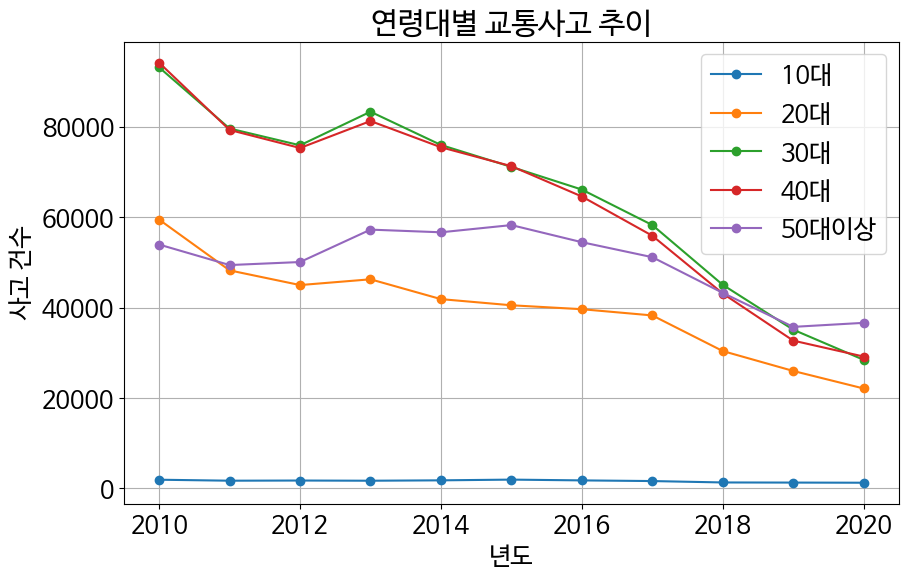

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 주어진 데이터를 데이터프레임으로 생성
data = {
    '구분': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    '10대': [1910, 1693, 1731, 1688, 1773, 1933, 1761, 1614, 1304, 1278, 1246],
    '20대': [59445, 48217, 44968, 46242, 41857, 40497, 39627, 38251, 30372, 25969, 22090],
    '30대': [93114, 79594, 75883, 83313, 75954, 71102, 66090, 58244, 45015, 35097, 28429],
    '40대': [94149, 79279, 75286, 81250, 75451, 71266, 64556, 55877, 43097, 32678, 29153],
    '50대이상': [53929, 49394, 50062, 57230, 56640, 58235, 54448, 51134, 43239, 35720, 36610]
}

df = pd.DataFrame(data)

# 시각화
plt.figure(figsize=(10, 6))

# 각 연령대에 대한 막대 그래프
for age_group in ['10대', '20대', '30대', '40대', '50대이상']:
    plt.plot(df['구분'], df[age_group], marker='o', label=age_group)

plt.title('연령대별 교통사고 추이')
plt.xlabel('년도')
plt.ylabel('사고 건수')
plt.legend()
plt.grid(True)
plt.show()

#시도별 전년대비 교통사고 건수

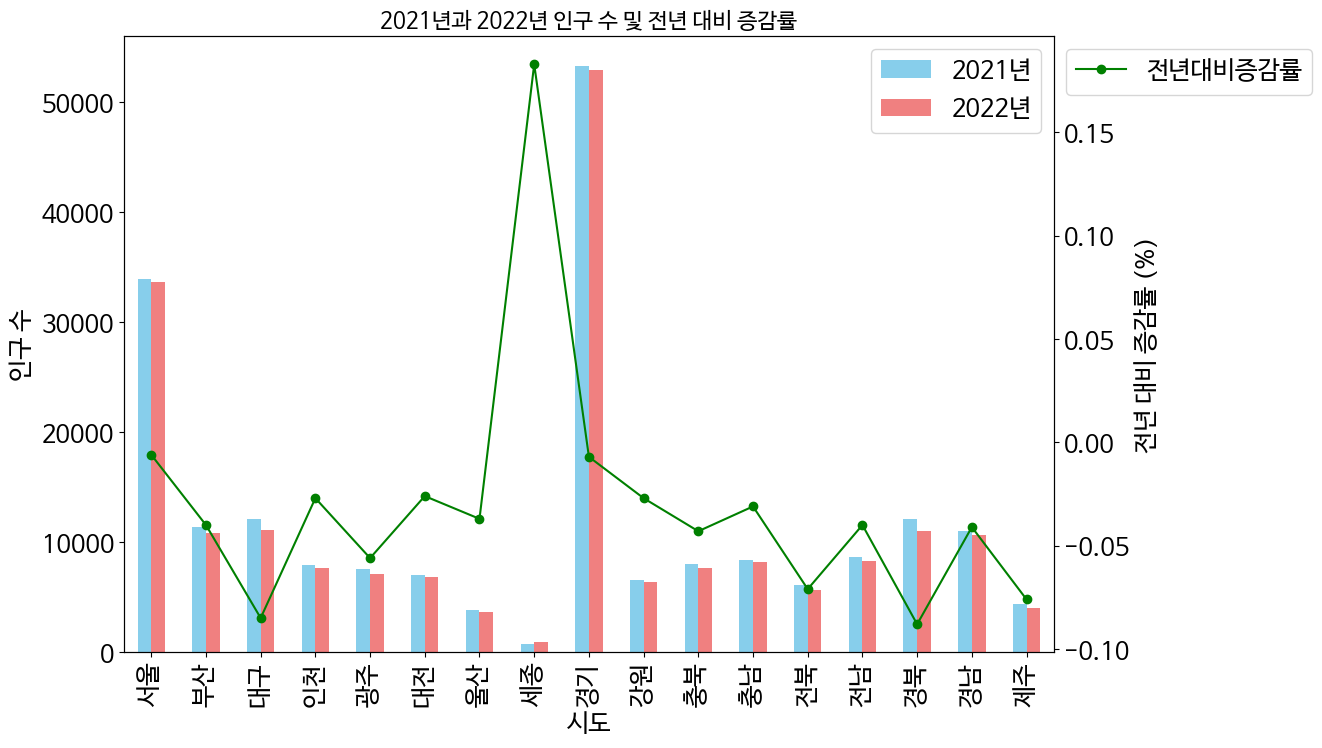

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일을 읽어오기
file_path = '도로교통공단_시도별 전년대비 교통사고 건수_20221231.csv'
data = pd.read_csv(file_path , encoding='euc-kr')

data['전년대비증감률'] = data['전년대비증감률'].str.rstrip('%').astype('float') / 100.0

# 지역명을 인덱스로 설정
data = data.set_index('시도')

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 8))

# 2021년과 2022년 값 막대 그래프로 표시
data[['2021년', '2022년']].plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_ylabel('인구 수', color='black')
ax1.tick_params('y', colors='black')

# 전년대비증감률 선 그래프로 표시
ax2 = ax1.twinx()
data['전년대비증감률'].plot(kind='line', marker='o', color='green', ax=ax2)
ax2.set_ylabel('전년 대비 증감률 (%)', color='black')
ax2.tick_params('y', colors='black')

# 그래프 제목과 레이블 설정
plt.title('2021년과 2022년 인구 수 및 전년 대비 증감률', fontsize=16)
plt.xlabel('시도', fontsize=14)

# x 축 레이블 45도 회전
plt.xticks(rotation=45, ha='right')

# 범례 추가
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# 그래프 표시
plt.show()




# 2022년 시도별 교통사고 수치표시

In [11]:
import pandas as pd
import folium
from folium import plugins

# 주어진 데이터를 데이터프레임으로 생성
data = {
    '시도': ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'],
    '2022년': [33698, 10882, 11102, 7695, 7122, 6841, 3660, 932, 52968, 6425, 7644, 8164, 5681, 8335, 11037, 10611, 4039],
}

df = pd.DataFrame(data)

# 데이터프레임에 위도와 경도 정보 추가
df['위도'] = [37.5665, 35.1796, 35.8714, 37.4563, 35.1595, 36.3504, 35.5466, 36.4802, 37.4138, 37.8228, 36.6357, 36.5271, 35.7175, 34.8163, 36.4919, 35.2372, 33.4996]
df['경도'] = [126.9780, 129.0756, 128.6014, 126.7052, 126.8526, 127.3845, 129.3170, 127.2880, 127.5183, 128.1555, 127.4912, 126.8312, 127.1530, 126.4628, 128.8889, 128.6922, 126.5312]

# folium 지도 생성
m = folium.Map(location=[36.5, 127.5], zoom_start=7)

# 각 지역에 원으로 사고 현장 표시
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=row['2022년'] / 1000,  # 원의 크기 조절
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        popup=f"{row['시도']} - {row['2022년']} 건"
    ).add_to(m)

# folium 지도 저장 및 표시
m.save('accident_map.html')
m
